# Practice Case - Sentiment Analysis that used to be with Spark
Sentiment Analysis adalah analisis penambangan kontekstual teks yang mengidentifikasi dan mengekstrak informasi subjektif dalam sumber, dan membantu para pebisnis untuk memahami sentimen sosial dari merek, produk atau layanan mereka saat memantau percakapan online. Biasanya data Sentiment Analysis ini sendiri bersumber dari platform atau layanan kritik dan saran online ataupun dari sosial media seperti twitter.<br>

Komponen dasar opini dalam Sentiment Analysis dibagi tiga: <Br>
- Opinion Holder: orang atau organisasi yang memiliki pendapat khusus tentang objek tertentu. <br>
- Object: objek opini/pendapat yang diungkapkan. <br>
- Opinion: pandangan, sikap, atau sebagian pada suatu objek dari opinion holder

Dalam analisis kali ini, data yang akan digunakan bersumber dari twitter dan akan dilakukan klasifikasi tweet dengan target sentimen positif dan negatif.

### Alur Sentiment Analysis dapat dilihat seperti di bawah ini:
![Sentiment](Sentiment.JPG)

# I. Dataset dan Tujuan Analisis
**Sumber Data**<br>
Data merupakan data tweet dari twitter yang berupa text dengan target sentiment nya yang sudah tersedia. Data berjumalah 1600000 baris dan 2 kolom. Variabel dalam data tersebut ada dua , yaitu:<br>
1. Text => Tweet
2. Target => Target Sentiment yang tediri dari :<br>
0 : Negatif <br>
1 : Positif

**Tujuan**<br>
Dalam hal ini, analisis sentimen ini bertujuan untuk mengklasifikasikan apakah tweet termasuk dalam sentimen positif atau negatif.

# Import Required Libraries
Memasukkan library yang dibutuhkan dalam proses analisis

In [1]:
!pip install wordcloud
!pip install tqdm
!pip install textblob

You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [36]:
import pandas as pd 
import numpy as np 

#import nltk for natural language toolkit
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#import string, regex, , uniqcode
import re, string, unicodedata

#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

#import tqdm 
from tqdm import tqdm 
tqdm.pandas()

#import beaurtiful soup 
from bs4 import BeautifulSoup

#save model 
import pickle 

#textblob
from textblob import TextBlob
from textblob import Word

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nurrim064119\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nurrim064119\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nurrim064119\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Load Dataset and Create Summarize
Memasukkan data dalam mesin dan membuat summary seperti count, max, min, dimensi, std, mean, tipe data, penggunaan memori, dll yang berguna agar user dan analyst dapat memahami seperti apa data yang akan dianalisis dan agar proses dan hasil analisis berjalan dengan tepat dan sesuai dengan yang diinginkan.

In [3]:
df=pd.read_csv('clean_tweet.csv')
df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [4]:
df.tail()

,text,target
1599995,just woke up having no school is the best feel...,1
1599996,thewdb com very cool to hear old walt intervie...,1
1599997,are you ready for your mojo makeover ask me fo...,1
1599998,happy th birthday to my boo of alll time tupac...,1
1599999,happy charitytuesday,1


In [5]:
print(df.columns)

Index(['text', 'target'], dtype='object')


In [4]:
df.shape

(1600000, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1596753 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [8]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
df.describe()

,target
count,1600000.0
mean,0.5
std,0.5
min,0.0
25%,0.0
50%,0.5
75%,1.0
max,1.0


### --Karena data sudah lengkap dan target telah tersedia maka proses Data Collection and Labelling tidak diikuti--

# II. Data Preparation
Menyiapkan data dengan mengecek missing value, jumlah data, dan duplikasi dalam data.

### Mengidentifikasi Missing Value

In [6]:
df.isnull().sum()

text      3247
target       0
dtype: int64

In [7]:
percentmissing=round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)
print(percentmissing)

text      0.2
target    0.0
dtype: float64


>Dapat dilihat bahwa terdapat data missing value yang berjumlah 3247 atau kurang lebih 0.2% dari keseluruhan data. Dalam hal ini, data missing value akan dihapus dengan penggunaan method 'df.dropna'. Setelah itu didapatkan data yang akan menjadi input dalam proses analisis dari 1600000 menjadi 1596753 data. Dalam hal ini diharapkan dengan data yang terbilang banyak ini dapt meningkatkan keefektivitasan dan akurasi hasil dari proses modelling.

In [8]:
dfclean=df.dropna()

In [9]:
dfclean.isnull().sum()

text      0
target    0
dtype: int64

In [18]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596753 entries, 0 to 1599999
Data columns (total 2 columns):
text      1596753 non-null object
target    1596753 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.5+ MB


# III. Data Preprocessing
Menyiapkan data untuk modeling dengan cleansing dengan cara sebagai berikut :<br>
1. Duplicate
2. Lower Casing 
3. Punctuation Removal 
4. Spelling correction 
5. Stopword removal
6. Tokenization 
7. Lemmatization 
8. Stemming
9. Frequent Words Removal
10. Rare Words Removal

## 1. Duplicate Tweet
Mencegah adanya kata duplikat dalam tweet untuk memperlancar proses analisis dan running dalam mesin

In [13]:
dfclean = dfclean.drop_duplicates()

## 2. Lower Casing
Membuat semua karakter memiliki ukuran yang sama yaitu huruf kecil agar dibaca sebagai karakter dan kata yang sama dengan yang lain. Jika "Aku" dan 'aku' tetap dibiarkan akan dibaca dua kata yang berbeda padahal sama. Maka dari itu dibutuhkan *Lower Casing* proses.

In [14]:
dfclean['text'] = dfclean['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfclean['text'].head()

0    awww that s a bummer you shoulda got david car...
1    is upset that he can t update his facebook by ...
2    i dived many times for the ball managed to sav...
3       my whole body feels itchy and like its on fire
4    no it s not behaving at all i m mad why am i h...
Name: text, dtype: object

## 3. Punctuation Removal
Menghapus tanda baca atau reguler expression yang tidak dibutuhkan agar tidak menghambat proses running dengan adanya penambahan karakter yang tidak dibutuhkan. Contohnya seperti :<br>
"The film, '@Pulp Fiction' was ? released _ in % $ year 1994."
=> Regex (regular Expression) “The film Pulp Fiction was released in year 1994”

In [15]:
dfclean['text'] = dfclean['text'].str.replace('[^\w\s]','')
dfclean['text'].head()

0    awww that s a bummer you shoulda got david car...
1    is upset that he can t update his facebook by ...
2    i dived many times for the ball managed to sav...
3       my whole body feels itchy and like its on fire
4    no it s not behaving at all i m mad why am i h...
Name: text, dtype: object

## 4. Spelling Correction
Mendeteksi typo dan memperbaikinya dengan kata-kata yang benar dan sesuai dengan kata baku. Contohnya seperti : Mussage => Message


In [16]:
dfclean['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    www that s a summer you should got david care ...
1    is upset that he can t update his facebook by ...
2    i dived many times for the ball managed to sav...
3       my whole body feels itchy and like its on fire
4    no it s not behaving at all i m mad why am i h...
Name: text, dtype: object

## 5. Stopword Removal
Menghilangkan spasi pada setiap tweet agar dapat dipisahkan setiap kata dalam tweet. Contohnya seperti :<br>
- With stopword : 'GeeksforGeeks – A Computer Science Portal for Geeks'<br>
- Without stopword : 'GeeksforGeeks, Computer Sciensce, Portal, Geeks'

In [17]:
stop = stopwords.words('english')
dfclean['text'] = dfclean['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dfclean['text'].head()

0         awww bummer shoulda got david carr third day
1    upset update facebook texting might cry result...
2    dived many times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                                     behaving mad see
Name: text, dtype: object

## 6. Tokenization
Memecah teks menjadi token-token yang berurutan bukan berdasrakan makna katanya. Contohnya seperti : <br>
- Without Tokenization : 'I am so happy with you'
- With Tokenization : 'I, am, so, happy, with, you'

In [18]:
TextBlob(dfclean['text'][1]).words

WordList(['upset', 'update', 'facebook', 'texting', 'might', 'cry', 'result', 'school', 'today', 'also', 'blah'])

## 7. Lematization
Lemma adalah bentuk dasar dari sebuah kata yang memiliki arti tertentu berdasar pada kamus. Lemmatization digunakan untuk memisahkan kata dasar nya dari suatu kata. Contohnya seperti : Troubled, Troubling, Troubles => Trouble

In [19]:
dfclean['text'] = dfclean['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dfclean['text'].head()

0         awww bummer shoulda got david carr third day
1    upset update facebook texting might cry result...
2      dived many time ball managed save rest go bound
3                      whole body feel itchy like fire
4                                     behaving mad see
Name: text, dtype: object

## 8. Stemming
Pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya dengan potongan yang sama. Contohnya seperti :<br>
Trouble, Troubled, Troubles => Troubl

In [20]:
st = PorterStemmer()
dfclean['text'] = dfclean['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
dfclean.head()

,text,target
0,awww bummer shoulda got david carr third day,0
1,upset updat facebook text might cri result sch...,0
2,dive mani time ball manag save rest go bound,0
3,whole bodi feel itchi like fire,0
4,behav mad see,0


## 9. Frequent Words Removal
Menghapus kata-kata yang sering muncul yang dianggap tidak perlu dan menghambat processing.

In [21]:
#frequents world removal
freq = pd.Series(' '.join(dfclean['text']).split()).value_counts()[:10]
freq

go       141017
get      108496
day      105510
good      87618
work      84873
like      82764
love      81055
u         70053
today     67829
time      65531
dtype: int64

In [22]:
freq = list(freq.index)
dfclean['text'] = dfclean['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dfclean['text'].head()

0             awww bummer shoulda got david carr third
1    upset updat facebook text might cri result sch...
2                 dive mani ball manag save rest bound
3                           whole bodi feel itchi fire
4                                        behav mad see
Name: text, dtype: object

## 10. Rare Words Removal
Menghapus kata-kata langka yang dinilai bukan merupakan kata baku.

In [23]:
#rare words removal
rare_word = pd.Series(' '.join(dfclean['text']).split()).value_counts()[-10:]
rare_word

vala          1
collosian     1
gowran        1
blumau        1
beneva        1
angmo         1
adrew         1
macchiatto    1
klienti       1
fondateur     1
dtype: int64

In [24]:
rare_word = list(rare_word.index)
dfclean['text'] = dfclean['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dfclean['text'].head()

0             awww bummer shoulda got david carr third
1    upset updat facebook text might cri result sch...
2                 dive mani ball manag save rest bound
3                           whole bodi feel itchi fire
4                                        behav mad see
Name: text, dtype: object

# IV. Data Exploration
Dalam bagian ini, akan dilakukan proses untuk menemukan kata-kata yang paling sering muncul dengan menggunakan 'WordCloud' dan membuat beberapa sentiment chart.

### Count Sentiment

In [25]:
#count sentiment 
sentiment = dfclean.groupby(['target'])['target'].count()
sentiment

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['tweet_count'] = chart['target']
chart.drop(['target'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum()
chart

,target,tweet_count,percent
0,0,768347,0.502799
1,1,759793,0.497201


In [27]:
chart["target"] = np.where(chart["target"] == 0, "Negative", "Positive")
chart.head()

,target,tweet_count,percent
0,Negative,768347,0.502799
1,Positive,759793,0.497201


### Pie Chart

(-1.1125341355630347,
 1.189640658057082,
 -1.1134672536773873,
 1.2023615600321143)

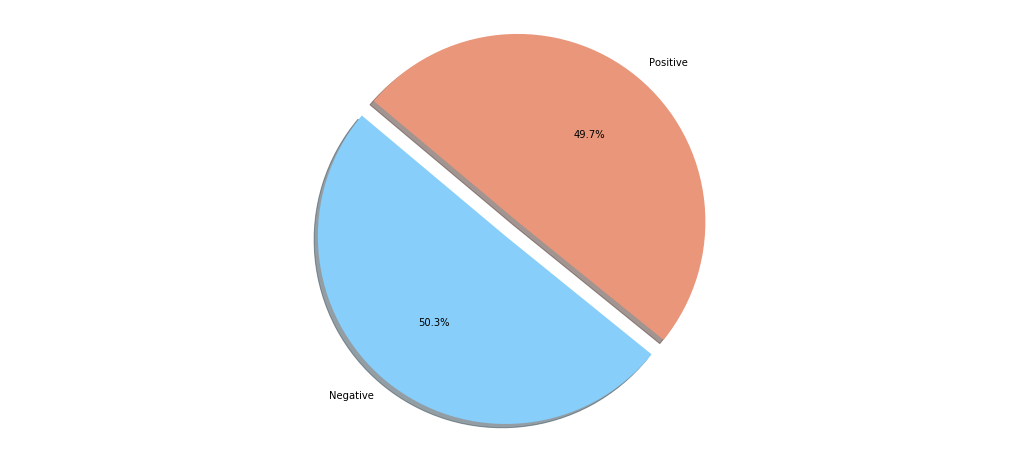

In [28]:
colors = [ 'lightskyblue','darksalmon']
explode = (0, 0.1)  # explode 1st slice
# Plot
figure = plt.figure(figsize= (18,8))
plt.pie(chart['tweet_count'], explode=explode, labels=chart['target'], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

> Dapat dilihat bahwa pembagian target sentiment adalah 50:50 , yaitu:<br>
- Target 0 (Negatif) : 50.3% = 768347
- Target 1 (Positif) : 49.7% = 759793

>yang artinya target sentimen dari data tersebut berjumlah sama untuk kedua target sentimen.

### WordCloud
Wordcloud adalah representasi visual dari data teks, biasanya digunakan untuk menggambarkan metadata keywords (tags) pada sebuah website/situs, untuk memvisualisasikan suatu bentuk teks secara bebas.<br>
Ukuran kata menunjukkan betapa pentingnya kata itu, mis. seberapa sering muncul dalam teks - frekuensinya. Model grafis ini populer karena menarik dan mudah dipahami. Dengan menggunakan word cloud, gambaran frekuensi kata-kata dapat ditampilkan dalam bentuk yang menarik, namun tetap informatif. Semakin sering satu kata digunakan, maka semakin besar pula ukuran kata tersebut ditampilkan dalam word cloud. <br>
Wordcloud berguna untuk memahami istilah yang paling menonjol untuk menentukan keunggulan relatifnya dengan cepat. Istilah yang menonjol ini ditentukan oleh ukuran kata yang muncul. <br>

**Pertama, akan dibuat wordcloud secara terpisah berdasarkan 'target'. Kedua, akan dibuat wordcloud dengan menggabungkan keduanya.**

**Wordcloud dengan target sentiment negatif = 0**

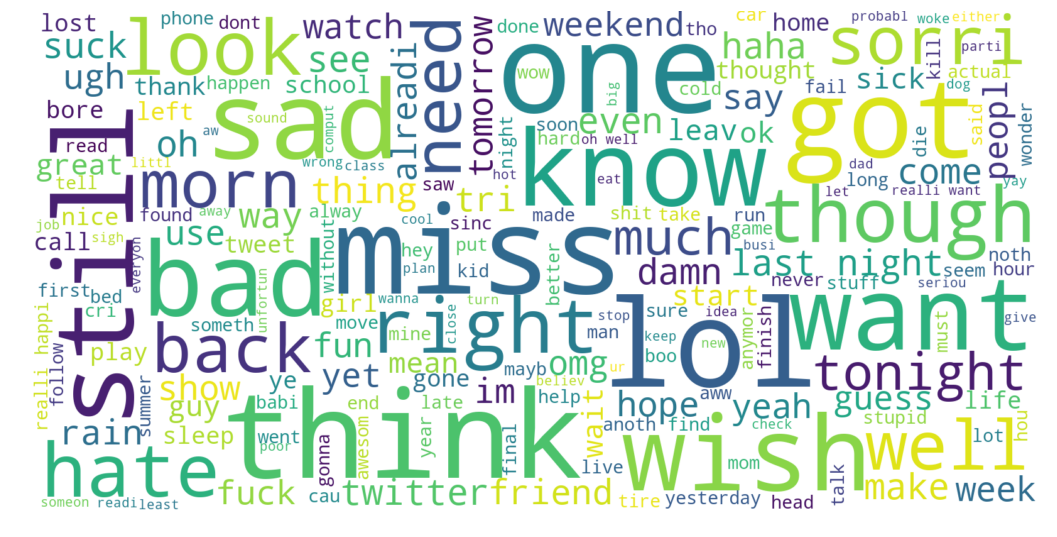

In [39]:
neg_tweets = dfclean[dfclean.target == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(background_color = 'white', width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [55]:
for t in neg_tweets.text[:200]:
    if 'miss' in t:
        print(t)

wish got watch miss premier
im sad miss lilli
awe miss
bed class gym class anoth gonna fli miss girlfriend
awww soo wish see final comfort im sad miss
miss p commiss wutcha play cop blood sand
missin boo
hey miss ya meet sup mama
bodi miss northern calif girl found polic found remain miss northern california girl
emili glad mommi done train new job miss
sc aaw miss ya im leav bh tomorrow morn think aww wanna beach w girl
miss babe long aliv happi yawwwnn tire imma tri sleep hope headstart
miss kenni power
india miss th test victori n th consecut win without loss
send dvd co miss heap happi
miss buddi ill ny th


>Dapat dilihat pada wordcloud diatas bahwa kata-kata yang sering muncul dalam data dengan target negatif relatif sama. Setiap kata dengan warna yang sama berarti memiliki bobot kemunculan yang relatif sama. <BR>
>Dari plot diatas kata-kata dengan ukuran yang paling besar dari setiap warna anatar lain :<Br>
1. LOL
2. ONE
3. THINK
4. MISS    

**Wordcloud dengan target sentiment positif = 1**

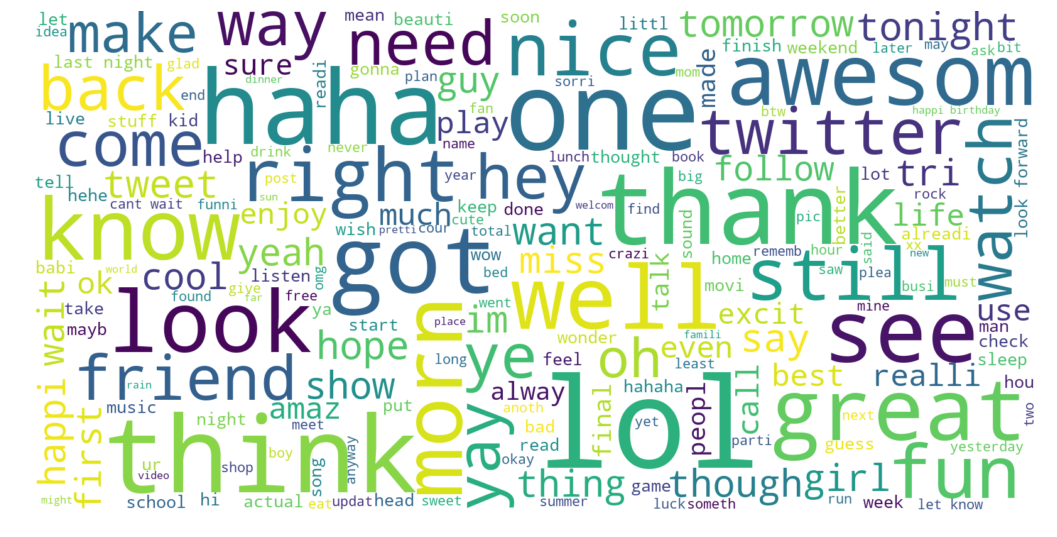

In [40]:
pos_tweets = dfclean[dfclean.target == 1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

wordcloud = WordCloud(background_color = 'white', width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [61]:
for t in pos_tweets.text[:200]:
    if 'miss' in t:
        print(t)

make sure dm post link video lol miss better permiss bless first
real moment miss much
shoot moon even miss land among star


>Dapat dilihat pada wordcloud diatas bahwa kata-kata yang sering muncul dalam data dengan target positif relatif sama. Setiap kata dengan warna yang sama berarti memiliki bobot kemunculan yang relatif sama. <BR>
>Dari plot diatas kata-kata dengan ukuran yang paling besar dari setiap warna anatar lain :<Br>
1. LOL
2. THINK
3. HAHA
4. ONE   

**Wordcloud gabungan semua target**

In [41]:
wordc = "".join(dfclean.text.values)
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.figure(figsize=(12,10))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

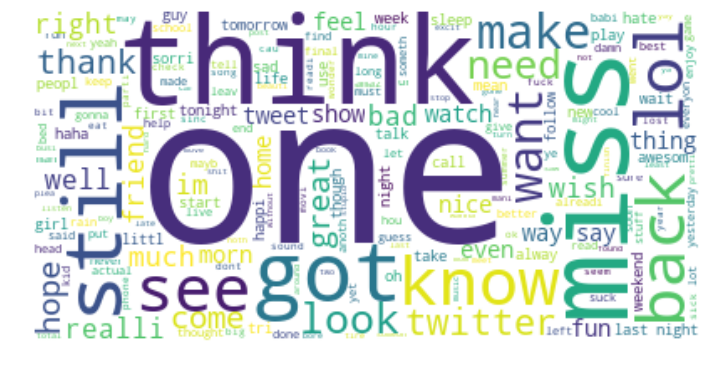

In [42]:
create_word_cloud(wordc)

>Dapat dilihat pada wordcloud diatas bahwa kata-kata yang sering muncul dalam data dengan gabungan kedua sentimen target. Setiap kata dengan warna yang sama berarti memiliki bobot kemunculan yang relatif sama. <BR>
>Dari plot diatas kata-kata dengan ukuran yang paling besar dari setiap warna antara lain :<Br>
1. ONE
2. THINK 

>Dari wordcloud diatas dapat dikatakan bahwa secara keseluruhan data memiliki sentimen target yang relatif sama antara positif dan negatif dengan kata yang paling sering muncul adalah **ONE** dan **THINK**. Dalam hal ini berarti kata-kata tersebut paling sering dikatakan dalam setiap tweet.<br>
Namun, dari hal ini kita belum bisa memutuskan apakah kedua kata tersebut termasuk dalams entimen positif atau negatif karena kedua kata tersebut muncul juga dalam wordcloud dengan target positif dan negatif yang dapat dilihat pada plot wordcloud pertama dan kedua.<br>
Artinya adalah wordcloud tidak bisa digunakan dalam menentukan apakah kata yang paling besar muncul tersebut memasukkan tweet ke dalam sentimen positif ataupun negatif. 

# V. Feature Extraction
Feature Extraction ini berguna untuk mengekstraksi variabel 'text' per kata yang ada agar dapat digunakan menjadi sebuah fitur/variabel dalam proses modeling klasifikasi.
Ekstraksi fitur dalam hal ini ada 2 proses, yaitu:
1. Count Vectorizer : untuk menghitung frekuensi data
2. TF-IDF ((Term Frequency – Inverse Document Frequency) Vectorization : untuk memberikan bobot antar kata dari keseluruhan data

Formula TF-IDF ((Term Frequency – Inverse Document Frequency) adalah sebagai berikut:<br>

**1.Formula TF (Term Frequency)**
![TF](TF.JPG)

**2. Formula IDF (Inverse Document Frequency)**
![IDF](IDF.JPG)

## 1. Count Vectorizer

In [43]:
count_vectorizer = CountVectorizer(stop_words='english')

## 2. TF-IDF Vectorizer

In [44]:
tfidf = TfidfVectorizer(stop_words='english' )

# VI. Modeling

## 1. Train Test Split

In [45]:
X = dfclean['text']
y = dfclean['target']

In [46]:
#countvectorizer
X_vectorizer = count_vectorizer.fit_transform(X)

#tfidf vectorizer
X_tfidf = tfidf.fit_transform(X)

In [47]:
#train test split using countvectorizer 
train_X_vectorizer, test_X_vectorizer, train_y, test_y = train_test_split(X_vectorizer, y, test_size=0.2, random_state=0)

#train test split using tfidfvectorizer 
train_X_tfidf, test_X_tfidf, train_y, test_y = train_test_split(X_tfidf, y, test_size=0.2, random_state=0)

## 2. Machine Learning Model dan Model Evaluation
Model Machine Learning yang akan dicoba dalam analisis ini ada 2, antara lain:<br>
1. Naive Bayes
2. Logistic Regression

Model tersebut merupakan model machine learning untuk klasifikasi. Model-model tersebut digunakan untuk mengklasifikasikan sentimensi setiap tweet. Apakah tweet tersebut termasuk dalam sentimen positif atau negatif dan akan dilihat bagaimana akurasi setiap model dan membandingkannya.

### Naive Bayes

In [48]:
# Countvectorizer
NB_vect = MultinomialNB()
NB_vect.fit(train_X_vectorizer,train_y)
NB_pred_vect_train = NB_vect.predict(train_X_vectorizer)
NB_pred_vect_test = NB_vect.predict(test_X_vectorizer)

In [49]:
# TFIDFVectorizer
#from sklearn.naive_bayes import GaussianNB
NB_tfidf = MultinomialNB()
NB_tfidf.fit(train_X_tfidf,train_y)
NB_pred_tfidf_train = NB_tfidf.predict(train_X_tfidf)
NB_pred_tfidf_test = NB_tfidf.predict(test_X_tfidf)

In [50]:
# find model evaluation for naive bayes
# using count vectorizer
print("______________ Countvectorizer ______________")

NB_akurasi_vec_train = NB_tfidf.score(train_X_vectorizer,train_y)
NB_akurasi_vec_test = NB_tfidf.score(test_X_vectorizer,test_y)

NB_recall_vec_train = recall_score(train_y, NB_pred_vect_train, average="micro")
NB_recall_vec_test = recall_score(test_y, NB_pred_vect_test,average="micro") 

NB_precision_vec_train = precision_score(train_y, NB_pred_vect_train,average="micro")
NB_precision_vec_test = precision_score(test_y, NB_pred_vect_test,average="micro")

NB_f1_score_vec_train = f1_score(train_y, NB_pred_vect_train,average="micro")
NB_f1_score_vec_test = f1_score(test_y,NB_pred_vect_test,average="micro")

print('Information :')
print('Akurasi train & test    : %.2f%%' % (NB_akurasi_vec_train * 100), '&', '%.2f%%' % (NB_akurasi_vec_test * 100))
print('Recall train & test     : %.2f%%' % (NB_recall_vec_train * 100), '&', '%.2f%%' % (NB_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_vec_train * 100), '&', '%.2f%%' % (NB_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_vec_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Akurasi train & test    : 77.36% & 75.18%
Recall train & test     : 77.67% & 75.03%
Precision train & test  : 77.67% & 75.03%
F1 Score train & test   : 77.67% & 75.03%


In [51]:
# using TF-IDF vectorizer
print("______________ TF-IDF ______________")

NB_akurasi_tfidf_train = NB_tfidf.score(train_X_tfidf,train_y)
NB_akurasi_tfidf_test = NB_tfidf.score(test_X_tfidf,test_y)

NB_recall_tfidf_train = recall_score(train_y, NB_pred_tfidf_train, average="micro")
NB_recall_tfidf_test = recall_score(test_y, NB_pred_tfidf_test,average="micro") 

NB_precision_tfidf_train = precision_score(train_y, NB_pred_tfidf_train,average="micro")
NB_precision_tfidf_test = precision_score(test_y, NB_pred_tfidf_test,average="micro")

NB_f1_score_tfidf_train = f1_score(train_y, NB_pred_tfidf_train,average="micro")
NB_f1_score_tfidf_test = f1_score(test_y,NB_pred_tfidf_test,average="micro")

print('Information :')
print('Akurasi train & test    : %.2f%%' % (NB_akurasi_tfidf_train * 100), '&', '%.2f%%' % (NB_akurasi_tfidf_test * 100))
print('Recall train & test     : %.2f%%' % (NB_recall_tfidf_train * 100), '&', '%.2f%%' % (NB_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_tfidf_train * 100), '&', '%.2f%%' % (NB_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_tfidf_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Akurasi train & test    : 77.64% & 74.29%
Recall train & test     : 77.64% & 74.29%
Precision train & test  : 77.64% & 74.29%
F1 Score train & test   : 77.64% & 75.03%


### Logistic Regression

In [52]:
# Countvectorizer 
Lr_vect = LogisticRegression()
Lr_vect.fit(train_X_vectorizer,train_y)
Lr_pred_vect_train = Lr_vect.predict(train_X_vectorizer)
Lr_pred_vect_test = Lr_vect.predict(test_X_vectorizer)

In [53]:
# TFIDFVectorizer
Lr_tfidf = LogisticRegression()
Lr_tfidf.fit(train_X_tfidf,train_y)
Lr_pred_tfidf_train = Lr_tfidf.predict(train_X_tfidf)
Lr_pred_tfidf_test = Lr_tfidf.predict(test_X_tfidf)

In [54]:
# using count vectorizer
print("______________ Countvectorizer ______________")

Lr_akurasi_vec_train = Lr_vect.score(train_X_vectorizer,train_y)
Lr_akurasi_vec_test = Lr_vect.score(test_X_vectorizer,test_y)

# Lr_clf_vec_report_train = classification_report(train_y, Lr_pred_vect_train)
# Lr_clf_vec_report_test = classification_report(test_y, Lr_pred_vect_test)

# Lr_confmatrix_vect_train = confusion_matrix(train_y, Lr_pred_vect_train) 
# Lr_confmatrix_vect_test = confusion_matrix(test_y, Lr_pred_vect_test)

Lr_recall_vec_train = recall_score(train_y, Lr_pred_vect_train, average="micro")
Lr_recall_vec_test = recall_score(test_y, Lr_pred_vect_test,average="micro") 

Lr_precision_vec_train = precision_score(train_y, Lr_pred_vect_train,average="micro")
Lr_precision_vec_test = precision_score(test_y, Lr_pred_vect_test,average="micro")

Lr_f1_score_vec_train = f1_score(train_y, Lr_pred_vect_train,average="micro")
Lr_f1_score_vec_test = f1_score(test_y,Lr_pred_vect_test,average="micro")

print('Information :')
# print('Confusion matrix for Train :')
# print(Lr_confmatrix_vect_train,'\n')
# print('Confusion matrix for Test :')
# print(Lr_confmatrix_vect_test,'\n')
# print('Classification Refort for Train :')
# print(Lr_clf_vec_report_train,'\n')
# print('Classification Refort for Test :')
# print(Lr_clf_vec_report_test,'\n')
print('Akurasi train & test    : %.2f%%' % (Lr_akurasi_vec_train * 100), '&', '%.2f%%' % (Lr_akurasi_vec_test * 100))
print('Recall train & test     : %.2f%%' % (Lr_recall_vec_train * 100), '&', '%.2f%%' % (Lr_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_vec_train * 100), '&', '%.2f%%' % (Lr_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_vec_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Akurasi train & test    : 78.87% & 75.84%
Recall train & test     : 78.87% & 75.84%
Precision train & test  : 78.87% & 75.84%
F1 Score train & test   : 78.87% & 75.84%


In [55]:
# using TF-IDF vectorizer
print("______________ TF-IDF ______________")

Lr_akurasi_tfidf_train = Lr_tfidf.score(train_X_tfidf,train_y)
Lr_akurasi_tfidf_test = Lr_tfidf.score(test_X_tfidf,test_y)

Lr_recall_tfidf_train = recall_score(train_y, Lr_pred_tfidf_train, average="micro")
Lr_recall_tfidf_test = recall_score(test_y, Lr_pred_tfidf_test,average="micro") 

Lr_precision_tfidf_train = precision_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_precision_tfidf_test = precision_score(test_y, Lr_pred_tfidf_test,average="micro")

Lr_f1_score_tfidf_train = f1_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_f1_score_tfidf_test = f1_score(test_y,Lr_pred_tfidf_test,average="micro")

print('Information :')
print('Akurasi train & test    : %.2f%%' % (Lr_akurasi_tfidf_train * 100), '&', '%.2f%%' % (Lr_akurasi_tfidf_test * 100))
print('Recall train & test     : %.2f%%' % (Lr_recall_tfidf_train * 100), '&', '%.2f%%' % (Lr_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_tfidf_train * 100), '&', '%.2f%%' % (Lr_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_tfidf_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Akurasi train & test    : 78.14% & 76.02%
Recall train & test     : 78.14% & 76.02%
Precision train & test  : 78.14% & 76.02%
F1 Score train & test   : 78.14% & 75.84%


## Perbandingan Akurasi Kedua Model dengan Kedua Metode Feature Extraction

In [57]:
data = [[NB_akurasi_vec_test * 100, NB_akurasi_tfidf_test * 100], [Lr_akurasi_vec_test * 100, Lr_akurasi_tfidf_test * 100]]
data = pd.DataFrame(data, columns = ['Naive Bayes', 'Logistic Regression'], index =['Countvectorizer', 'TF-IDF']) 
data

,Naive Bayes,Logistic Regression
Countvectorizer,75.177340,74.29424
TF-IDF,75.843836,76.01725


# VII. Result

Dalam analisis klasifikasi sentimen tweet dengan proses Sentiment Analysis ini digunakan dua model machine learning untuk klasifikasi, yaitu :<br>
1. Naive Bayes
2. Logistic Regression

Dari hasil modeling yang didapat dapat disimpulkan bahwa kedua model, yaitu **Naive Bayes** dan **Logistic Regression** dapat digunakan untuk mengklasifikasikan tweet ke dalam sentimen positif atau negatif melalui proses Sentiment Analysis.<br>
Dalam hal ini sebelum memulai proses modeling, dilakukan terlebih dahulu proses feature extraction menggunakan dua metode, yaitu :<br>
1. Count Vectorizer
2. TF-IDF ((Term Frequency – Inverse Document Frequency) Vectorization

Dengan membangun model menggunakan data training dan testing dengan pembagian data sebesar 80:20 secara berurutan, didapatkan hasil akurasi model, yaitu sebagai berikut : <br>
1. Naive Bayes :<br>
- Count Vectorizer : **75.18%**
- TF-IDF : **75.84%**

2. Logistic Regression :<br>
- Count Vectorizer : **74.29%**
- TF-IDF : **76.02%**

Dari hasil akurasi diatas dapat dibandingkan bahwa:<br>
1. **Logistic Regression** menghasilkan akurasi yang lebih besar dibandingkan dengan **Naive Bayes** , yaitu hasil akurasi terbesar adalah 76.02%.
2. Berdasarkan kedua feature extraction, didapatkan **TF-IDF** menghasilkan akurasi yang lebih besar dibandingkan **Count Vectorizer** , yaitu 76.02%.

Maka, model klasifikasi terbaik diantara kedua model tersebut adalah **Logistic Regression** dengan menggunakan metode Feature Extraction **TF-IDF** dengan hasil akurasinya adalah **76.02%** agar hasil akurasi pemodelan yang didapatkan lebih besar sehingga hasil klasifikasi tweet dengan data baru nanti akan lebih tepat dan sesuai. 

Dapat dilihat dari hasil akurasi terbaik analisis ini bahwa masih perlu adanya perbaikan model, data, maupun preprocessing agar menghasilkan nilai akurasi yang lebih besar lagi. Sara-saran untuk analisis selanjutnya antara lain : <br>
1. Melakukan percobaan Train Test Split dengan persentase data training yang lain
2. Menggunakan model evaluasi yang lain
3. Melakukan cross validation atau tuning parameter
4. dsb

Hasil dari klasifikasi tweet ke dalam sentimen positif atau negatif ini berguna bagi perusahaan untuk mengembangkan strategi mereka, untuk memahami perasaan pelanggan terhadap produk atau merek, bagaimana orang merespons kampanye atau peluncuran produk mereka dan mengapa konsumen tidak membeli beberapa produk. Selain itu, dapat digunakan juga bagi para pebisnis untuk memahami sentimen sosial dari merek, produk atau layanan mereka saat memantau percakapan online melaui platform milik pribadi maupun sosial media.